In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


- Reading the data set

In [2]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


## Step 1: checking the basic information

- checking the shape 

In [3]:
df.shape

(1000, 17)

- how does the data look?

In [4]:
df.sample(5) ## randomly choose 5 rows to get rid off biased nature of data that may seen 


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
850,843-73-4724,A,Yangon,Normal,Male,Fashion accessories,74.10,1,3.7050,77.8050,1/25/2019,11:05,Cash,74.10,4.761905,3.7050,9.2
601,881-41-7302,C,Naypyitaw,Normal,Female,Fashion accessories,64.99,1,3.2495,68.2395,1/26/2019,10:06,Credit card,64.99,4.761905,3.2495,4.5
614,443-59-0061,A,Yangon,Member,Male,Food and beverages,67.45,10,33.7250,708.2250,2/3/2019,11:25,Ewallet,674.50,4.761905,33.7250,4.2
447,453-12-7053,C,Naypyitaw,Normal,Male,Fashion accessories,45.74,3,6.8610,144.0810,3/10/2019,17:38,Credit card,137.22,4.761905,6.8610,6.5
889,880-46-5796,A,Yangon,Member,Male,Sports and travel,76.92,10,38.4600,807.6600,3/17/2019,19:53,Ewallet,769.20,4.761905,38.4600,5.6


## column description

##### - Attributes Information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax 
- to find total=(df['Unit price']*df['Quantity'])+df['Tax 5%']
total


- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- to find gross_Margin=(df['Total']- df['cogs'])/df['Total']*(100)
gross_Margin  ## means profit %


- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)




- basic information

In [5]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

##### checking the unique values

In [91]:
#for i in df.columns:
    #print(i,"---",df[i].unique(),"and total unique values are",df[i].nunique())

### step 2 : Preprocessing

- checking the missing values

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### from the above output, we can say there is no missing values in the data

- checking the column types

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### from this we know, Date and Time is in object data type, for better analysis we will change it to DateTime

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Feature engineering

In [92]:
from datetime import  datetime as dt
df["Days"]=df["Date"].dt.day_name()
df["Month"]=df["Date"].dt.month_name()
df["weekday"]=df.Date.dt.weekday
df.head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4,10


#### Branch A is in city Yangon
#### Branch B is in city Mandalay
#### Branch c is in city Naypyitaw-


- so we will keep one of them and drop other and invoiceid is irrelevant to our data so we will drop that too


In [13]:
df.drop(columns=["Invoice ID","City"],inplace=True)

In [14]:
df.head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4


### Insights

- Descriptive statistical summary of numeric data

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
weekday,1000.0,3.032000,1.973543,0.000000,1.000000,3.000000,5.000000,6.000000


- min unit price is 10 and max unit price is 99
- There might be outliers present in Total, cogs and gross income columns.

- checking the outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

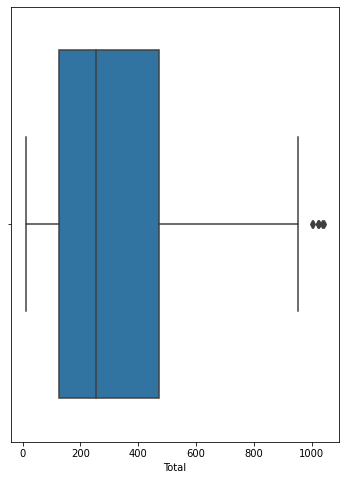

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

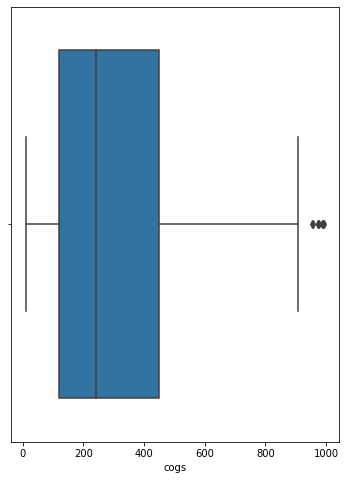

<Figure size 1440x576 with 0 Axes>

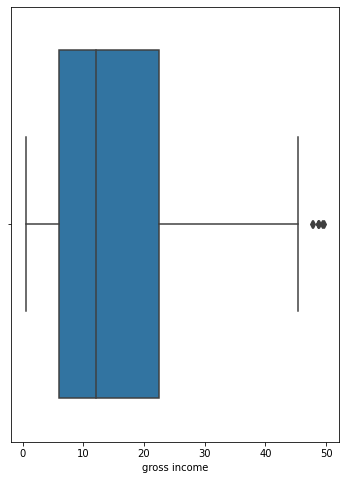

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [93]:
col=1 ## for no of plots
for i in df.columns:
    plt.figure(figsize=(20,8))
    if (i=="Total") | (i=="cogs") | (i=="gross income"):
        plt.subplot(1,3,col);
        sns.boxplot(df[i]);
        plt.xlabel(i);
        col+=1

- Descriptive statistical summary of object data

In [20]:
df.describe(include="object").T

,count,unique,top,freq
Branch,1000,3,A,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Payment,1000,3,Ewallet,345
Days,1000,7,Saturday,164
Month,1000,3,January,352


### Step 3: checking correlation

In [21]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,weekday
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.007040
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.054770
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.013879
weekday,-0.007040,0.054770,0.038809,0.038809,0.038809,NaN,0.038809,-0.013879,1.000000


<AxesSubplot:>

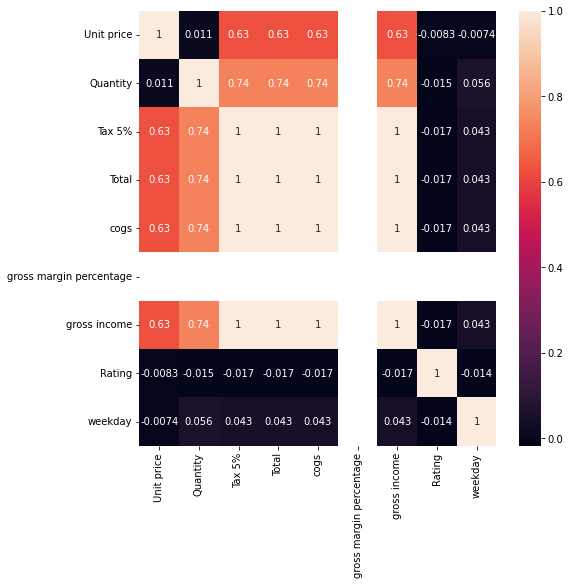

In [22]:
plt.figure(figsize=(8,8))
cor_matrix=df.corr(method="spearman")
sns.heatmap(cor_matrix,annot=True)

- Tax, Total, cogs and gross income are correlated

### step4: insights

- find out the total sales and gross income of the company

In [23]:
df["Total"].sum()

322966.749

In [24]:
df["gross income"].sum()

15379.368999999999

- The total sale of supermarket company of all the three months is $ 322966.749

- The  total  gross  income  of  supermarket  company of  all  the  three  months  is  $ 15379.368999999999


- find out the total sales and gross income of each branches

In [25]:
df.groupby("Branch")["Total"].agg(["sum","mean","min","max"])

,sum,mean,min,max
Branch,,,,
A,106200.3705,312.354031,12.6945,1039.29
B,106197.6720,319.872506,18.6375,1022.49
C,110568.7065,337.099715,10.6785,1042.65


- Total Highest sale was recorded on Branch C on the basis of Total

- Total Lowest sale was recorded on Branch B on the basis of Total


- since the gross income and total is highly correlated, we will consider Total column from now on

## Since highest sale was recorded at Branch C, we will see some more detail of Branch C

- At which date and month highest sale was recorded at C Branch?

In [26]:
print("the highest sale was of amount :", df["Total"].max())
df_c=df[df["Branch"]=="C"]
df_c[df_c["Total"]==df_c["Total"].max()][["Date","Month"]]

the highest sale was of amount : 1042.65


,Date,Month
350,2019-02-15,February


- What was the category of highest sale customer and its corresponding product category?

In [27]:
df_c[df_c["Total"]==df_c["Total"].max()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
350,C,2019-02-15,Member,Fashion accessories


- At which date and month lowest sale was recorded at C Branch?

In [28]:
print("the lowest sale was of amount :", df["Total"].min())
df_c=df[df["Branch"]=="C"]
df_c[df_c["Total"]==df_c["Total"].min()][["Date","Month"]]

the lowest sale was of amount : 10.6785


,Date,Month
822,2019-02-07,February


- What was the category of lowest sale customer and its corresponding product category?

In [29]:
df_c[df_c["Total"]==df_c["Total"].min()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
822,C,2019-02-07,Member,Sports and travel


In [30]:
df.head(1)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5


In [31]:
# 1 Find out the hot selling month(in plot)
print(df.groupby(["Month"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False))


              max         sum      min        mean
Month                                             
January   1034.46  116291.868  12.6945  330.374625
February  1042.65   97219.374  10.6785  320.856020
March     1022.49  109455.507  16.2750  317.262339


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Month', ylabel='Total'>

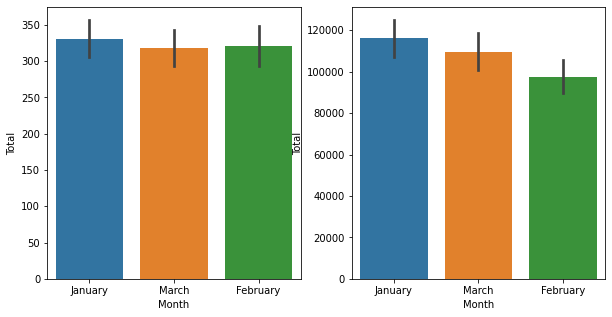

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(df["Month"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Month"],df["Total"],data=df,estimator=sum)

- January was the hot selling month

In [33]:
# 2 find out the hot selling month corresponding to  each branch (in plot)
print(df.groupby(["Month","Branch"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False))


                      max         sum      min        mean
Month    Branch                                           
March    C        943.299  37199.0430  17.0940  350.934368
January  B       1022.385  37176.0585  18.6375  334.919446
         C       1034.460  40434.6810  13.4190  331.431811
February C       1042.650  32934.9825  10.6785  329.349825
January  A        931.035  38681.1285  12.6945  325.051500
February A       1039.290  29860.1205  19.2465  317.660856
         B        853.146  34424.2710  30.9960  315.819000
March    B       1022.490  34597.3425  26.7225  308.904844
         A        951.825  37659.1215  16.2750  296.528516


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Month', ylabel='Total'>

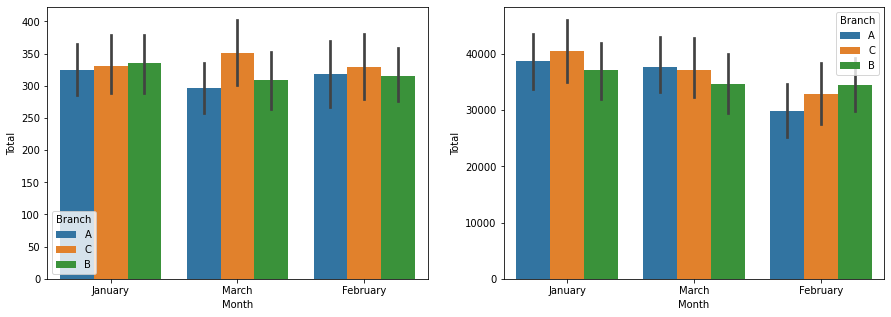

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df["Month"],df["Total"],data=df,hue=df["Branch"])
plt.subplot(1,2,2)
sns.barplot(df["Month"],df["Total"],data=df,hue=df["Branch"],estimator=sum)

- For Branch A, January was the hot selling month on the basis of mean

- For Branch B, January was the hot selling month on the basis of mean

- For Branch C, March  was the hot selling month on the basis of mean

In [35]:
# 3 find the total weekdays sale and weekend sale

df["weekday"].unique()

array([5, 4, 6, 0, 3, 2, 1])

In [36]:
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale---",week_day["Total"].sum())
print("weekends sale---",weekend["Total"].sum())

weekdays sale--- 222388.04700000002
weekends sale--- 100578.702


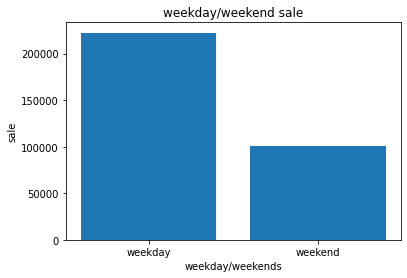

In [37]:
l1=[week_day["Total"].sum(),weekend["Total"].sum()]
l2=["weekday","weekend"]
plt.bar(l2,l1)
plt.title("weekday/weekend sale")
plt.xlabel("weekday/weekends")
plt.ylabel("sale")
plt.show();

In [38]:
 # 4 find weekday sale and weekend sale of each branch
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale of all branches--",week_day.groupby(["Branch"])["Total"].sum())
print("weekends sale of all branches ---",weekend.groupby(["Branch"])["Total"].sum())


weekdays sale of all branches-- Branch
A    72428.139
B    74497.920
C    75461.988
Name: Total, dtype: float64
weekends sale of all branches --- Branch
A    33772.2315
B    31699.7520
C    35106.7185
Name: Total, dtype: float64


### parenthesis does not passed because we only want attributies not function

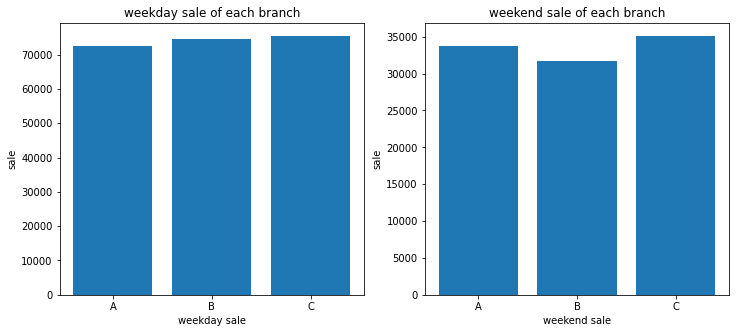

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(week_day.groupby(["Branch"])["Total"].sum().index,week_day.groupby(["Branch"])["Total"].sum().values)
plt.title("weekday sale of each branch")
plt.xlabel("weekday sale")
plt.ylabel("sale")
plt.subplot(1,2,2)
plt.bar(weekend.groupby(["Branch"])["Total"].sum().index,weekend.groupby(["Branch"])["Total"].sum().values)
plt.title("weekend sale of each branch")
plt.xlabel("weekend sale")
plt.ylabel("sale")
plt.show();


- weekday and weekend sale at Branch C was the highest

In [40]:
# find hot selling day, plot also
print(df.groupby(["Days"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="sum",ascending=False))


                max         sum      min        mean
Days                                                
Saturday   1023.750  56120.8095  12.6945  342.200058
Tuesday    1022.385  51482.2455  13.4190  325.836997
Thursday    921.186  45349.2480  10.6785  328.617739
Sunday      939.540  44457.8925  16.1070  334.269868
Friday     1042.650  43926.3405  16.2015  316.016838
Wednesday  1034.460  43731.1350  23.4990  305.812133
Monday      936.600  37899.0780  14.6790  303.192624


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Days', ylabel='Total'>

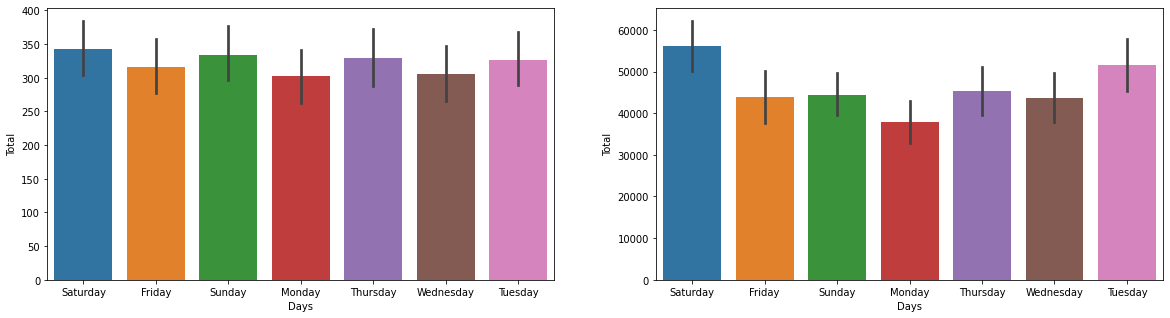

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,estimator=sum)

- Saturday was the hot selling day on the basis of sum and mean

In [42]:
# find hot selling day of each branch
print(df.groupby(["Branch","Days"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="sum",ascending=False))

                        max         sum      min        mean
Branch Days                                                 
B      Saturday   1022.4900  21284.4240  28.4235  354.740400
       Tuesday    1022.3850  18859.2390  33.3585  355.834698
C      Saturday   1023.7500  18070.9725  17.0940  334.647639
       Wednesday  1034.4600  17755.8150  23.4990  355.116300
       Tuesday     937.8180  17667.7935  13.4190  327.181361
       Sunday      939.5400  17035.7460  23.7510  370.342304
A      Sunday      926.9505  17006.8185  16.1070  327.054202
       Saturday    931.0350  16765.4130  12.6945  335.308260
B      Thursday    867.0900  15778.6230  33.9360  358.605068
A      Thursday    921.1860  15422.2740  30.4080  335.266826
C      Friday     1042.6500  14964.7155  16.2015  393.808303
A      Tuesday     932.3370  14955.2130  16.2750  293.239471
       Friday     1039.2900  14543.8650  19.1940  290.877300
B      Friday      922.6350  14417.7600  35.1960  282.701176
A      Monday      649.2

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Days', ylabel='Total'>

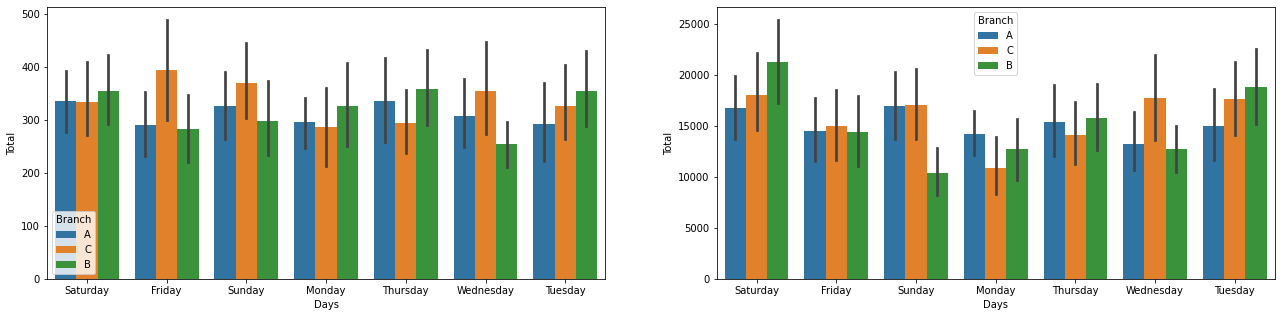

In [43]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"])
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"],estimator=sum)

- Saturday was the hot selling day of Branch A on the basis of sum and total
- friday was the hot selling day of Branch C on the basis of sum and total
- Tuesday and Saturday was the hot selling day of Branch B on the basis of sum and total

In [44]:
 #  find weekday sale and weekend sale of each branch in each month
week_day=df[df["weekday"]<=4]
weekend=df[df["weekday"]>4]
print("weekdays sale of all branches--",week_day.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of all branches ---",weekend.groupby(["Branch","Month"])["Total"].sum())


weekdays sale of all branches-- Branch  Month   
A       February    20417.2395
        January     25736.4870
        March       26274.4125
B       February    25964.4525
        January     27634.8870
        March       20898.5805
C       February    21950.5020
        January     30470.0550
        March       23041.4310
Name: Total, dtype: float64
weekends sale of all branches --- Branch  Month   
A       February     9442.8810
        January     12944.6415
        March       11384.7090
B       February     8459.8185
        January      9541.1715
        March       13698.7620
C       February    10984.4805
        January      9964.6260
        March       14157.6120
Name: Total, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'weekend sale of all branches--')

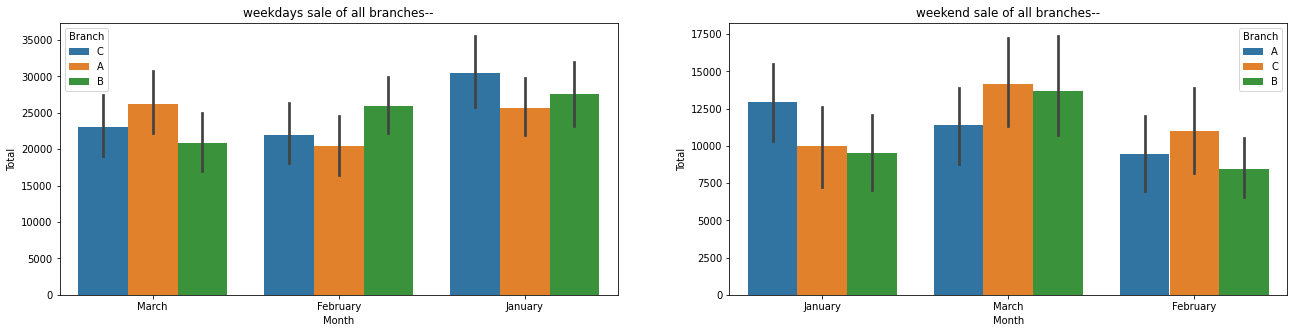

In [103]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day["Month"],week_day["Total"],data=week_day,hue=week_day["Branch"],estimator=sum)
plt.title("weekdays sale of all branches--")
plt.subplot(1,2,2)
sns.barplot(weekend["Month"],weekend["Total"],data=weekend,hue=weekend["Branch"],estimator=sum)
plt.title("weekend sale of all branches--")

In [45]:
#  find weekday sale and weekend sale of branch A
print("sale trend at branch A ")
a=df[(df["Branch"]=="A")]
week_day_a=a[a["weekday"]<=4]
weekend_a=a[a["weekday"]>4]
print("weekdays sale of branch A in each month--",week_day_a.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch A in each month ---",weekend_a.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch A 
weekdays sale of branch A in each month-- Branch  Month   
A       February    20417.2395
        January     25736.4870
        March       26274.4125
Name: Total, dtype: float64
weekends sale of branch A in each month --- Branch  Month   
A       February     9442.8810
        January     12944.6415
        March       11384.7090
Name: Total, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'weekend sale of Branch A--')

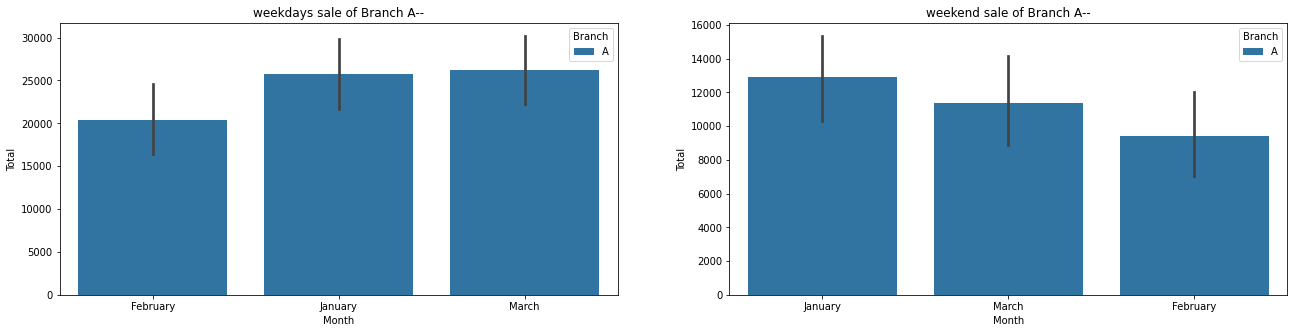

In [106]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_a["Month"],week_day_a["Total"],data=week_day_a,hue=week_day_a["Branch"],estimator=sum)
plt.title("weekdays sale of Branch A--")
plt.subplot(1,2,2)
sns.barplot(weekend_a["Month"],weekend_a["Total"],data=weekend_a,hue=weekend_a["Branch"],estimator=sum)
plt.title("weekend sale of Branch A--")

In [46]:
#  find weekday sale and weekend sale of branch B
print("sale trend at branch B ")
b=df[(df["Branch"]=="B")]
week_day_b=b[b["weekday"]<=4]
weekend_b=b[b["weekday"]>4]
print("weekdays sale of branch B in each month--",week_day_b.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch B in each month ---",weekend_b.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch B 
weekdays sale of branch B in each month-- Branch  Month   
B       February    25964.4525
        January     27634.8870
        March       20898.5805
Name: Total, dtype: float64
weekends sale of branch B in each month --- Branch  Month   
B       February     8459.8185
        January      9541.1715
        March       13698.7620
Name: Total, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'weekend sale of Branch B--')

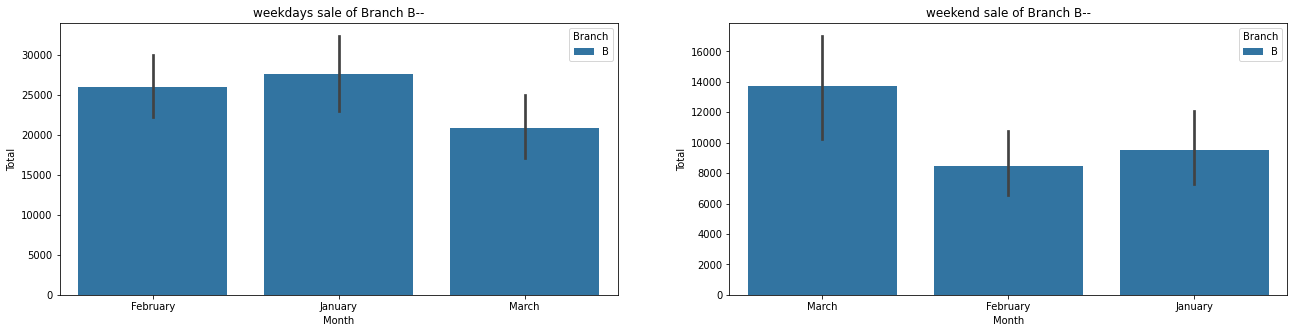

In [107]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_b["Month"],week_day_b["Total"],data=week_day_b,hue=week_day_b["Branch"],estimator=sum)
plt.title("weekdays sale of Branch B--")
plt.subplot(1,2,2)
sns.barplot(weekend_b["Month"],weekend_b["Total"],data=weekend_b,hue=weekend_b["Branch"],estimator=sum)
plt.title("weekend sale of Branch B--")

In [47]:
#  find weekday sale and weekend sale of branch C
print("sale trend at branch C ")
c=df[(df["Branch"]=="C")]
week_day_c=c[c["weekday"]<=4]
weekend_c=c[c["weekday"]>4]
print("weekdays sale of branch C in each month--",week_day_c.groupby(["Branch","Month"])["Total"].sum())
print("weekends sale of branch C in each month ---",weekend_c.groupby(["Branch","Month"])["Total"].sum())

sale trend at branch C 
weekdays sale of branch C in each month-- Branch  Month   
C       February    21950.502
        January     30470.055
        March       23041.431
Name: Total, dtype: float64
weekends sale of branch C in each month --- Branch  Month   
C       February    10984.4805
        January      9964.6260
        March       14157.6120
Name: Total, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'weekend sale of Branch C--')

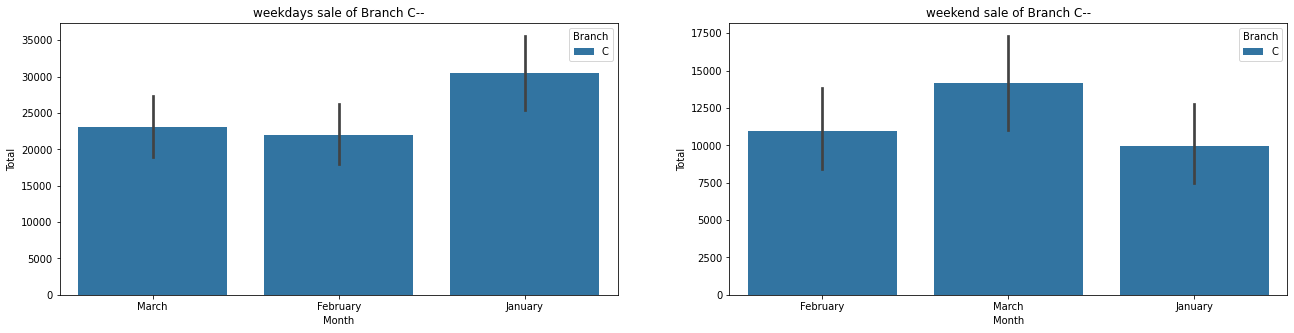

In [108]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(week_day_c["Month"],week_day_c["Total"],data=week_day_c,hue=week_day_c["Branch"],estimator=sum)
plt.title("weekdays sale of Branch C--")
plt.subplot(1,2,2)
sns.barplot(weekend_c["Month"],weekend_c["Total"],data=weekend_c,hue=weekend_c["Branch"],estimator=sum)
plt.title("weekend sale of Branch C--")

### customer visiting trend of each branch corresponding to each month

In [48]:
a=df[(df["Branch"] =="A")]
a.head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-09 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6


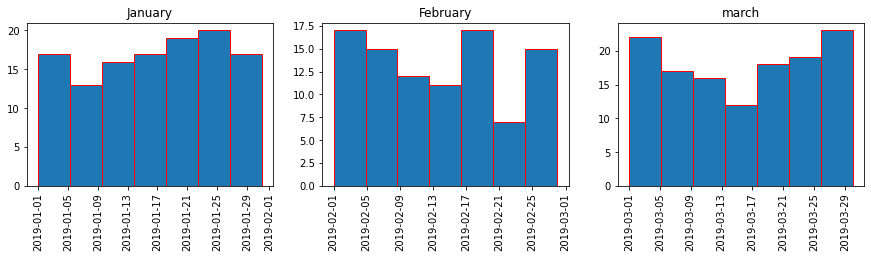

In [49]:
plt.figure(figsize = (15,3))
a=df[(df["Branch"] =="A")]
a_jan=a[a["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
a_march=a[a["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()


### Insights of Branch A
- jan : max customer visited on 23-27 and min visited on 05-09
- feb : max customer visited on 16-20 and min visited on 20-24
- mar : max customer visited on 24-29 and min visited on 13-17

## For Branch B

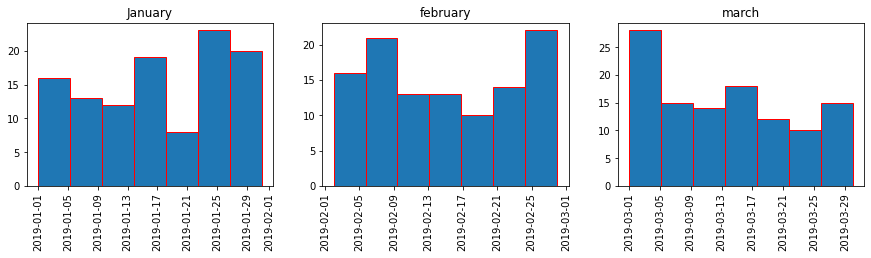

In [50]:
plt.figure(figsize = (15,3))
b=df[(df["Branch"] =="B")]
b_jan=b[b["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(b_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
b_feb=b[b["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(b_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
b_march=b[b["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(b_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()




### Insights of Branch B
- jan : max customer visited on 23-27 and min visited on 18-22
- feb : max customer visited on 24-28 and min visited on 17-21
- mar : max customer visited on 01-05 and min visited on 22-26

## FOR Branch C

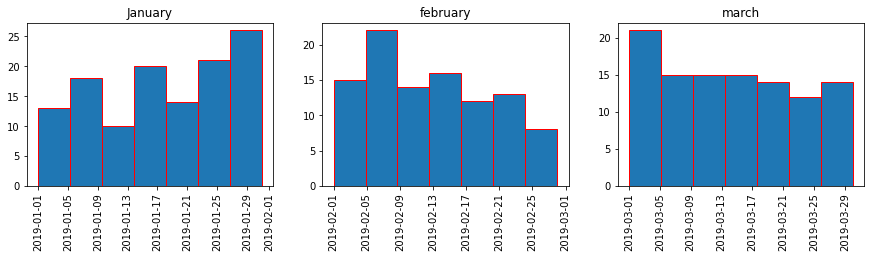

In [51]:
plt.figure(figsize = (15,3))
c=df[(df["Branch"] =="C")]
c_jan=c[c["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(c_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
c_feb=c[c["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(c_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
c_march=c[c["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(c_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()



### Insights of Branch C
- jan : max customer visited on 23-27 and min visited on 09-13
- feb : max customer visited on 05-09 and min visited on 24-28
- mar : max customer visited on 01-05 and min visited on 22-26

### product and sale

In [52]:
### find the most populated product of the company
df["Product line"].mode()

0    Fashion accessories
dtype: object

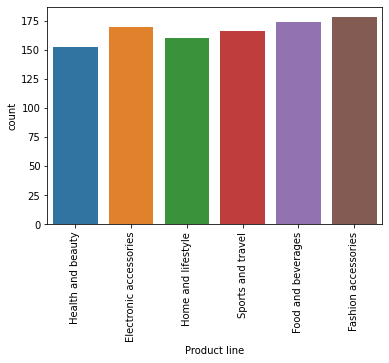

In [110]:
sns.countplot(x="Product line",data=df);
plt.xticks(rotation=90);

### for distribution check pie chart

In [54]:
p_index=df['Product line'].value_counts().index
p_index

Index(['Fashion accessories', 'Food and beverages', 'Electronic accessories',
       'Sports and travel', 'Home and lifestyle', 'Health and beauty'],
      dtype='object')

In [55]:
p_values=c['Product line'].value_counts().values
p_values

array([66, 65, 55, 52, 45, 45])

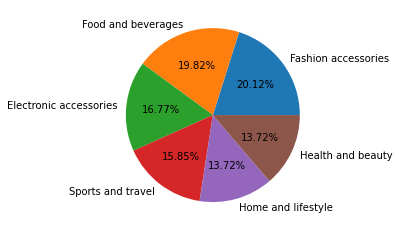

In [56]:
plt.pie(p_values,labels=p_index,autopct='%.2f%%')
plt.show()

### find product taste trend of customers for each branch
#### or product demand at each branch

In [57]:
df.groupby(["Branch"])["Product line"].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

### or

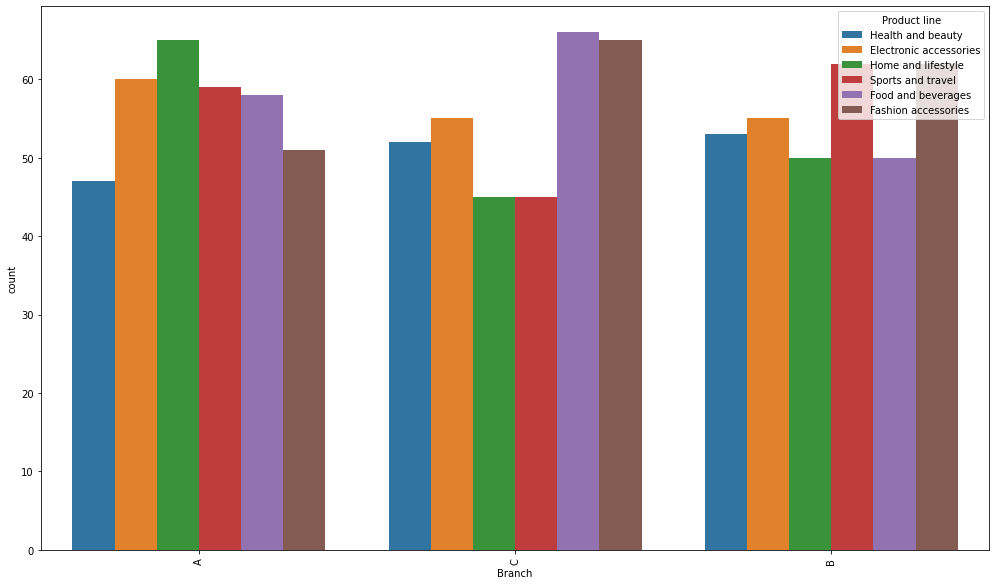

In [58]:
plt.figure(figsize=(17,10))
sns.countplot(x="Branch",data=df,hue="Product line");
plt.xticks(rotation=90);

- At branch A, customer demanded for Home and Lifestyle product the most.
- At branch B, customer demanded for Fashion accessories and Sports and travel products the most.
- At branch C, customer demanded for Food and Beverages product the most.

#### find sales of each product

In [59]:
a=df.groupby(["Product line"])["Total"].sum().sort_values(ascending=False)
a

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

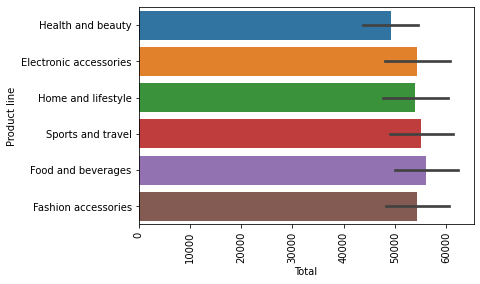

In [60]:
sns.barplot(x="Total",y="Product line",data=df,estimator=sum,orient="h")
plt.xticks(rotation=90);
plt.show();

### orien="h" show better view

- find the product wise sale of each branch

In [61]:
df.groupby(["Branch","Product line"])["Total"].sum().sort_values(ascending=False)


Branch  Product line          
C       Food and beverages        23766.8550
A       Home and lifestyle        22417.1955
C       Fashion accessories       21560.0700
B       Sports and travel         19988.1990
        Health and beauty         19980.6600
A       Sports and travel         19372.6995
C       Electronic accessories    18968.9745
A       Electronic accessories    18317.1135
B       Home and lifestyle        17549.1645
A       Food and beverages        17163.1005
B       Electronic accessories    17051.4435
C       Health and beauty         16615.3260
B       Fashion accessories       16413.3165
A       Fashion accessories       16332.5085
C       Sports and travel         15761.9280
B       Food and beverages        15214.8885
C       Home and lifestyle        13895.5530
A       Health and beauty         12597.7530
Name: Total, dtype: float64

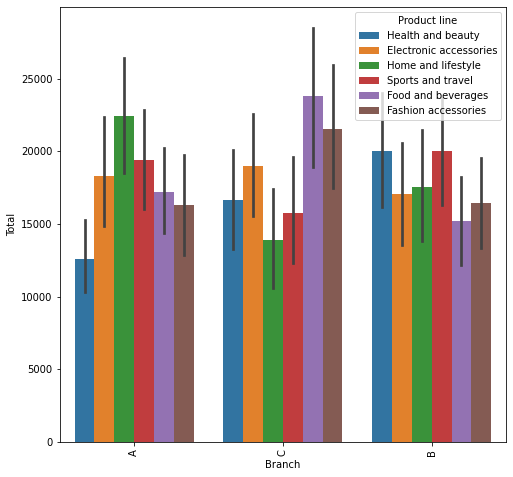

In [62]:
plt.figure(figsize=(8,8))
sns.barplot(x="Branch",y="Total",hue="Product line",data=df,estimator=sum)
plt.xticks(rotation=90);

- Find monthly sale of each product

In [63]:
df.groupby(["Product line","Month"])["Total"].sum()

Product line            Month   
Electronic accessories  February    17362.9050
                        January     18831.2880
                        March       18143.3385
Fashion accessories     February    19009.8615
                        January     19345.1160
                        March       15950.9175
Food and beverages      February    20000.3580
                        January     19570.5300
                        March       16573.9560
Health and beauty       February    14602.2555
                        January     16383.1710
                        March       18208.3125
Home and lifestyle      February    12434.3835
                        January     20494.7400
                        March       20932.7895
Sports and travel       February    13809.6105
                        January     21667.0230
                        March       19646.1930
Name: Total, dtype: float64

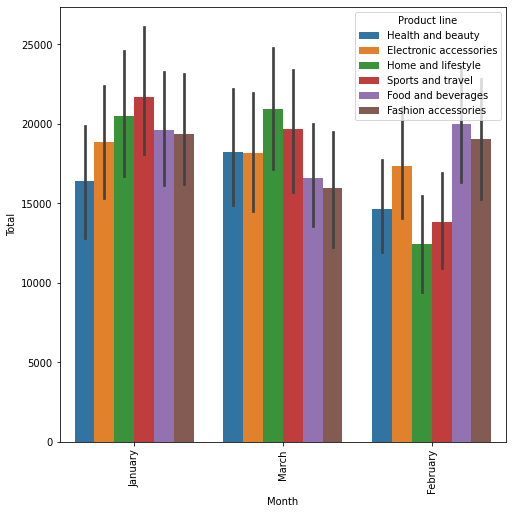

In [111]:
plt.figure(figsize=(8,8))
sns.barplot(x="Month",y="Total",hue="Product line",data=df,estimator=sum)
plt.xticks(rotation=90);

- Find how many types of customers

In [64]:
df["Gender"].count()
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

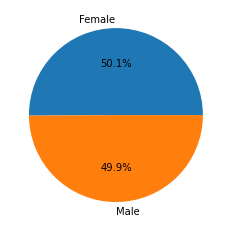

In [114]:
plt.pie(df["Gender"].value_counts(),labels=df["Gender"].unique(),autopct="%0.01f%%");

- find the customer product taste according to the gender

In [65]:
df.groupby(["Product line"])["Gender"].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


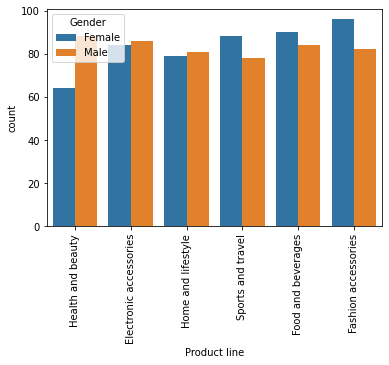

In [173]:
sns.countplot(df["Product line"],hue=df["Gender"]);
plt.xticks(rotation=90);

### Branch wise

In [66]:
df.groupby(["Branch","Product line"])["Gender"].value_counts()

Branch  Product line            Gender
A       Electronic accessories  Male      32
                                Female    28
        Fashion accessories     Female    28
                                Male      23
        Food and beverages      Male      35
                                Female    23
        Health and beauty       Male      26
                                Female    21
        Home and lifestyle      Male      33
                                Female    32
        Sports and travel       Male      30
                                Female    29
B       Electronic accessories  Female    28
                                Male      27
        Fashion accessories     Female    33
                                Male      29
        Food and beverages      Female    29
                                Male      21
        Health and beauty       Male      33
                                Female    20
        Home and lifestyle      Male      28
                

- who contributed most? male/female

In [67]:
df.groupby(["Gender"])["Total"].agg(["sum","mean"])

,sum,mean
Gender,,
Female,167882.925,335.095659
Male,155083.824,310.789226


- find the total sale of each product by gender

<AxesSubplot:xlabel='Gender', ylabel='Total'>

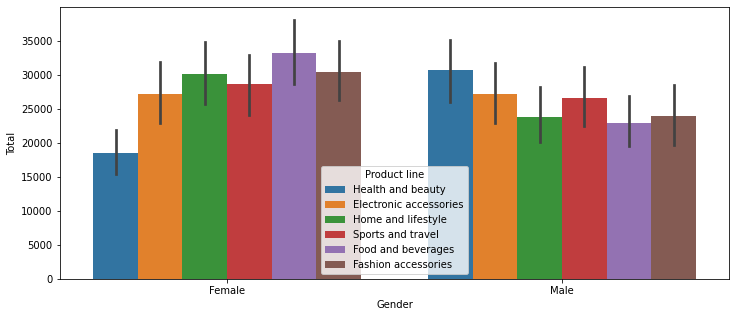

In [68]:
plt.figure(figsize=(12,5))
sns.barplot(x="Gender",y="Total",data=df,hue="Product line",estimator=sum)

- which branch has highest customers

In [69]:
df.groupby(["Branch"])["Customer type"].count()

Branch
A    340
B    332
C    328
Name: Customer type, dtype: int64

#### How many Customers were normal or Member of the company?

In [70]:

### classify TOTAL income based on customer type?
df.groupby(["Customer type"])["Total"].sum()


Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

#### Find Customers type count of each branch

In [71]:
df.groupby(["Branch"])["Customer type"].value_counts()


Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


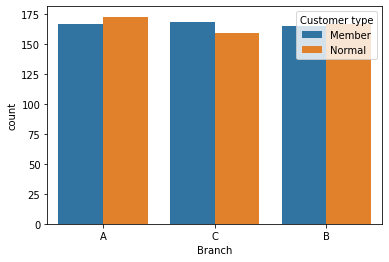

In [178]:
sns.countplot(df["Branch"],hue=df["Customer type"]);

### Time

- find the peak time of customers visit at supermarket

In [72]:
df["Time"].mode()

0   2022-12-09 14:42:00
1   2022-12-09 19:48:00
dtype: datetime64[ns]

In [73]:
df.groupby(["Branch"])["Time"].value_counts()

Branch  Time               
A       2022-12-09 11:51:00    3
        2022-12-09 12:43:00    3
        2022-12-09 13:34:00    3
        2022-12-09 15:48:00    3
        2022-12-09 19:44:00    3
                              ..
C       2022-12-09 20:47:00    1
        2022-12-09 20:50:00    1
        2022-12-09 20:51:00    1
        2022-12-09 20:54:00    1
        2022-12-09 20:59:00    1
Name: Time, Length: 788, dtype: int64

#### can not analyse so we will make a hour column for better analyization

In [74]:
df["Hour"]=df["Time"].dt.hour


In [75]:
df.head(1)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13


<AxesSubplot:xlabel='Hour', ylabel='count'>

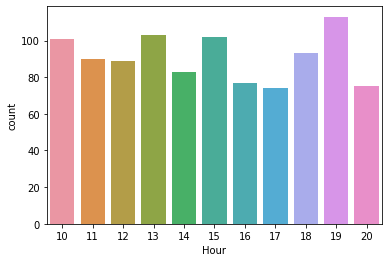

In [76]:
sns.countplot(x="Hour",data=df)

Text(0, 0.5, 'Quantity')

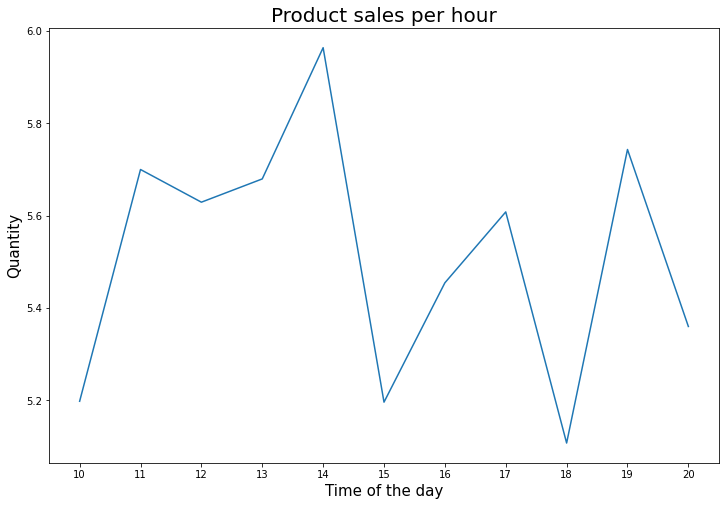

In [77]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df,ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
# plt.yticks(df['Quantity'].unique())
plt.ylabel('Quantity', fontsize=15)



## Find hot selling item of each hour

Text(0, 0.5, 'Quantity')

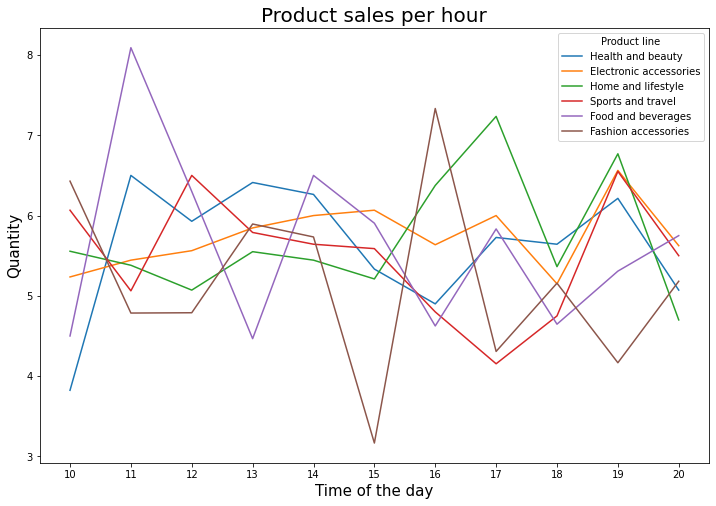

In [78]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df,hue="Product line",ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
plt.ylabel('Quantity', fontsize=15)


- food and beverages are seem to be purchased around 10-11 am
- fashion and accessiores are seem to be purchased around 4 pm, which can be an ideal time not only for adults but also for teenagers.
- home and lifestyle item recorded highest sale around 5 pm, which can be the ideal time for homemakers to make some purchases 
- electronic sales are seen around 7 pm 
- health and beauty : we cannot see high peak time for this product

## Rating

- find highest, lowest and average rating of the company

In [79]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Company min, max and avg rating')

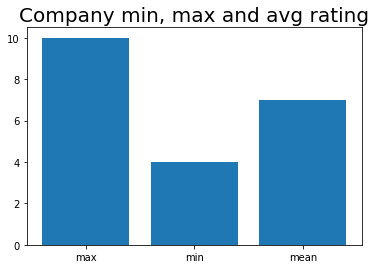

In [80]:
plt.bar(df["Rating"].agg(["max","min","mean"]).index,df["Rating"].agg(["max","min","mean"]).values)
plt.title('Company min, max and avg rating', fontsize=20)

In [81]:
print(len(df[df["Rating"]==10.0]), "customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")

5 customers had given 10 rating
0.5 % customers had given 10 rating


#### find avg rating of customers
#### make countplot of ratings- give bins

In [133]:
df.groupby(["Customer type"])["Rating"].mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

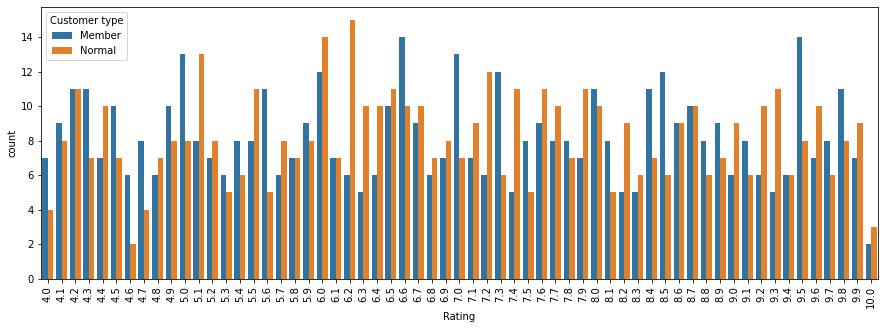

In [138]:
plt.figure(figsize=(15,5))
sns.countplot(x="Rating",data=df,hue="Customer type");
plt.xticks(rotation=90);

(array([102.,  93.,  89., 107., 108., 101., 105.,  99.,  91., 105.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

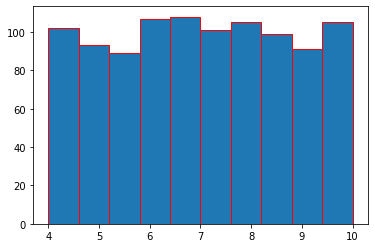

In [82]:
plt.hist(df["Rating"],edgecolor="red")

In [83]:
len(df[df["Rating"]>=9.0])

166

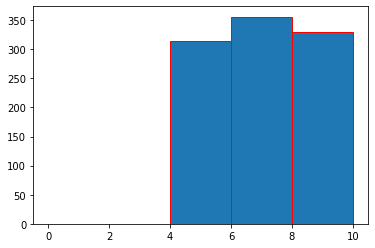

In [84]:
plt.hist(df["Rating"],edgecolor="red",bins=[0,2,4,6,8,10]);

-find highest, lowest and average rating at each branch

In [85]:
x=df.groupby(["Branch"])["Rating"].agg(["max","min","mean"])
x.reset_index()

,Branch,max,min,mean
0,A,10.0,4.0,7.027059
1,B,10.0,4.0,6.818072
2,C,10.0,4.0,7.072866


#### using subplot, make 3 subplots-branch ,max,min, mean

- which product category is most liked by customer

In [143]:
df.groupby(["Product line"])["Rating"].agg(["max","min","mean"]).sort_values(by="mean")

,max,min,mean
Product line,,,
Home and lifestyle,9.9,4.1,6.837500
Sports and travel,10.0,4.0,6.916265
Electronic accessories,10.0,4.0,6.924706
Health and beauty,10.0,4.0,7.003289
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218


- find max,min and avg product rating of each branch

In [87]:
df.groupby(["Branch","Product line"])["Rating"].agg(["max","mean","min"])


max      mean  min
Branch Product line                               
A      Electronic accessories   9.9  6.911667  4.3
       Fashion accessories      9.9  6.878431  4.0
       Food and beverages       9.9  7.253448  4.0
       Health and beauty       10.0  6.900000  4.2
       Home and lifestyle       9.9  6.930769  4.1
       Sports and travel        9.9  7.257627  4.1
B      Electronic accessories  10.0  7.116364  4.0
       Fashion accessories      9.9  6.722581  4.1
       Food and beverages       9.9  6.994000  4.0
       Health and beauty        9.9  7.100000  4.0
       Home and lifestyle       9.8  6.516000  4.1
       Sports and travel       10.0  6.509677  4.1
C      Electronic accessories   9.8  6.747273  4.1
       Fashion accessories      9.9  7.440000  4.0
       Food and beverages       9.9  7.080303  4.0
       Health and beauty        9.9  6.998077  4.1
       Home and lifestyle       9.8  7.060000  4.3
       Sports and travel       10.0  7.028889  4.0

## Payment

- find the no of e-wallet, credit card and cash paying customers

In [88]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment Channel')

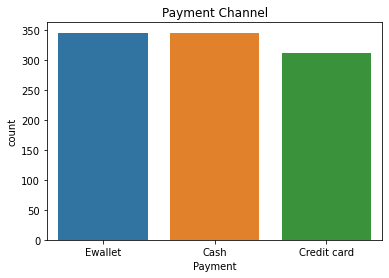

In [144]:
sns.countplot(x="Payment",data=df).set_title("Payment Channel") 

- find the no of e-wallet, credit card and cash paying customers of each branch

In [89]:
df.groupby(["Branch"])["Payment"].value_counts()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment Channel Branch wise')

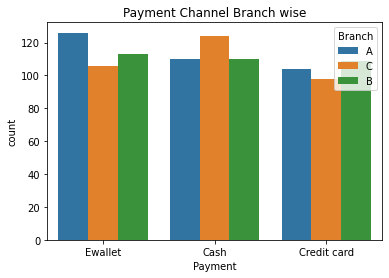

In [145]:
sns.countplot(x="Payment",data=df,hue="Branch").set_title("Payment Channel Branch wise") 

- which type of payers leads to more sale

In [188]:
df.groupby(["Branch","Payment"])["Total"].sum()

Branch  Payment    
A       Cash           33781.2510
        Credit card    33094.7505
        Ewallet        39324.3690
B       Cash           35339.4615
        Credit card    37344.8565
        Ewallet        33513.3540
C       Cash           43085.8575
        Credit card    30327.4650
        Ewallet        37155.3840
Name: Total, dtype: float64

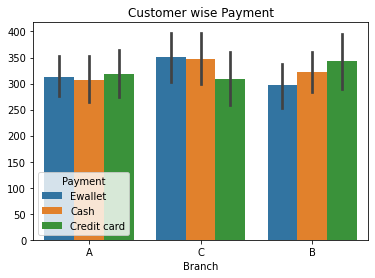

In [193]:
sns.barplot(df["Branch"],df["Total"].values,data=df,hue="Payment").set_title("Customer wise Payment");